<a href="https://colab.research.google.com/github/pmensah28/Machine-Learning-Projects/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DIABETES PREDICTION USING MACHINE LEARNING ALGORITHMS**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/diabetes.csv")

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

In [ ]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
data.isna().values.any()

False

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.index

RangeIndex(start=0, stop=768, step=1)

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


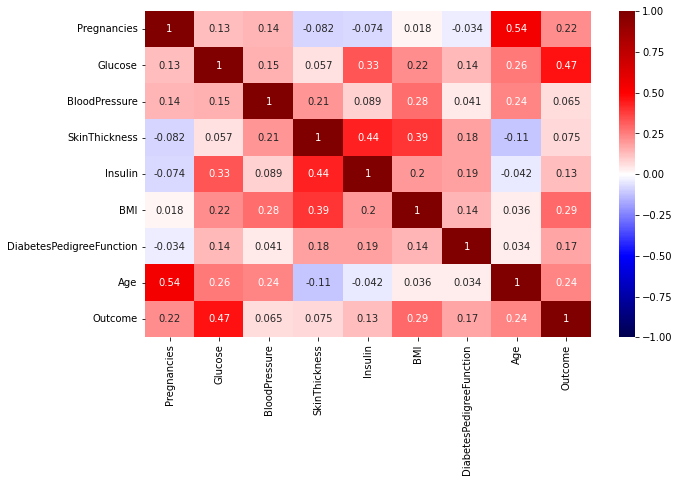

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap="seismic")
plt.gca().patch.set(hatch="data", edgecolor="#666")
plt.show()

In [ ]:
print(f"The number of rows: {len(data)}")
print(f"The number of rows missing in Insuin is: {len(data.loc[data['Insulin']==0])}")
print(f"The number of missing values in Glucose is: {len(data.loc[data['Glucose']==0])}")
print(f"The number of rows missing in Pregnancies is: {len(data.loc[data['Pregnancies']==0])}")
print(f"The number of missing values in BloodPressure is: {len(data.loc[data['BloodPressure']==0])}")
print(f"The number of rows missing in SkinThickness is: {len(data.loc[data['SkinThickness']==0])}")
print(f"The number of missing values in BMI is: {len(data.loc[data['BMI']==0])}")
print(f"The number of rows missing in DiabetesPedigreeFunction is: {len(data.loc[data['DiabetesPedigreeFunction']==0])}")
print(f"The number of missing values in Age is: {len(data.loc[data['Age']==0])}")

The number of rows: 768
The number of rows missing in Insuin is: 374
The number of missing values in Glucose is: 5
The number of rows missing in Pregnancies is: 111
The number of missing values in BloodPressure is: 35
The number of rows missing in SkinThickness is: 227
The number of missing values in BMI is: 11
The number of rows missing in DiabetesPedigreeFunction is: 0
The number of missing values in Age is: 0


In [ ]:
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['Pregnancies'] = data['Pregnancies'].replace(0, data['Pregnancies'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())

In [ ]:
y = data['Outcome'].copy()
X = data.drop('Outcome', axis=1).copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=99)

In [ ]:
y.unique()
X=X.astype(np.float)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50.0
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31.0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32.0
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27.0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47.0


In [ ]:
scaler = MinMaxScaler()
X = scaler.fit(X)

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)

In [ ]:
print('Classification Report for Testing\n')
print(f'Test Accuracy: {acc_decision_tree}\n')
print(classification_report(
    digits=4,
    y_true=y_test,
    y_pred=dt_pred, target_names=['Class 0', 'Class 1']
))

Classification Report for Testing

Test Accuracy: 66.88

              precision    recall  f1-score   support

     Class 0     0.8068    0.6762    0.7358       105
     Class 1     0.4848    0.6531    0.5565        49

    accuracy                         0.6688       154
   macro avg     0.6458    0.6646    0.6461       154
weighted avg     0.7044    0.6688    0.6787       154



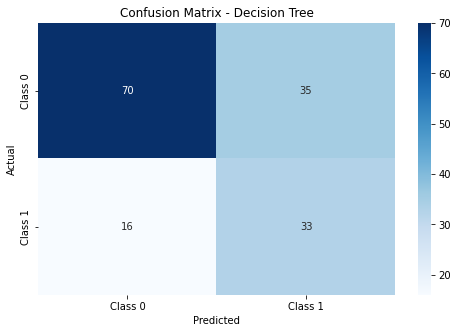

In [ ]:
confmat = confusion_matrix(y_true=y_test, y_pred=dt_pred)

index = ["Class 0", "Class 1"]
columns = ["Class 0", "Class 1"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues") 
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train, y_train)
rf_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)

In [ ]:
print(f"Test Accuracy: {acc_random_forest}\n")
print("Classification Report for Testing\n")
print(classification_report(
    digits=4,
    y_true=y_test,
     y_pred=rf_pred, target_names=["Class 0", "Class 1"]
))

Test Accuracy: 77.27

Classification Report for Testing

              precision    recall  f1-score   support

     Class 0     0.8500    0.8095    0.8293       105
     Class 1     0.6296    0.6939    0.6602        49

    accuracy                         0.7727       154
   macro avg     0.7398    0.7517    0.7447       154
weighted avg     0.7799    0.7727    0.7755       154



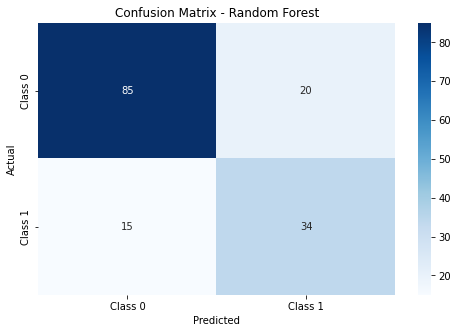

In [ ]:
confmat = confusion_matrix(y_true=y_test, y_pred=rf_pred)

index = ["Class 0", "Class 1"]
columns = ["Class 0", "Class 1"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues") 
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
acc_lr = round(lr.score(X_test, y_test)* 100, 2)

In [ ]:
print(f"Test Accuracy {acc_lr}\n")
print(classification_report(
    digits=4,
    y_true=y_test,
    y_pred=lr_pred, target_names=["Class 0", "Class 1"]
))

Test Accuracy 80.52

              precision    recall  f1-score   support

     Class 0     0.8378    0.8857    0.8611       105
     Class 1     0.7209    0.6327    0.6739        49

    accuracy                         0.8052       154
   macro avg     0.7794    0.7592    0.7675       154
weighted avg     0.8006    0.8052    0.8015       154



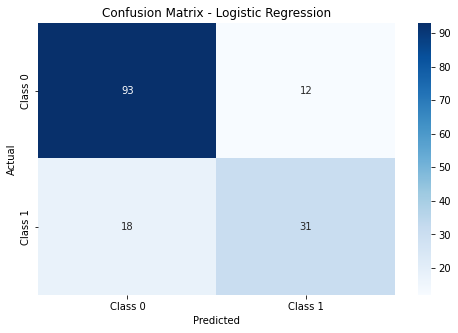

In [ ]:
confmat = confusion_matrix(y_true=y_test, y_pred=lr_pred)

index = ["Class 0", "Class 1"]
columns = ["Class 0", "Class 1"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues") 
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()